In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Genre_Male              200 non-null    bool 
dtypes: bool(1), int64(4)
memory usage: 6.6 KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.drop('CustomerID', axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
minmax = MinMaxScaler()

In [12]:
scaled_df = minmax.fit_transform(df)

In [13]:
scaled_df[:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

In [14]:
from sklearn.cluster import KMeans

In [56]:
import numpy as np

In [39]:
scores = []

In [40]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    scores.append(kmeans.inertia_)

In [55]:
kmeans_scores = np.array(scores).reshape(-1, 1)
normalized_kmeans = MinMaxScaler().fit_transform(kmeans_scores).flatten()

In [41]:
from matplotlib import pyplot as plt

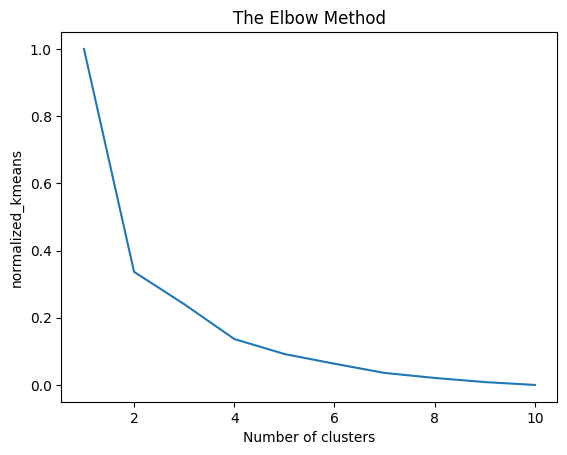

In [57]:
plt.plot(range(1, 11), normalized_kmeans)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('normalized_kmeans')
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
ac_score = []

In [61]:
for i in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    labels = ac.fit_predict(scaled_df)
    ac_score.append(silhouette_score(scaled_df, labels))

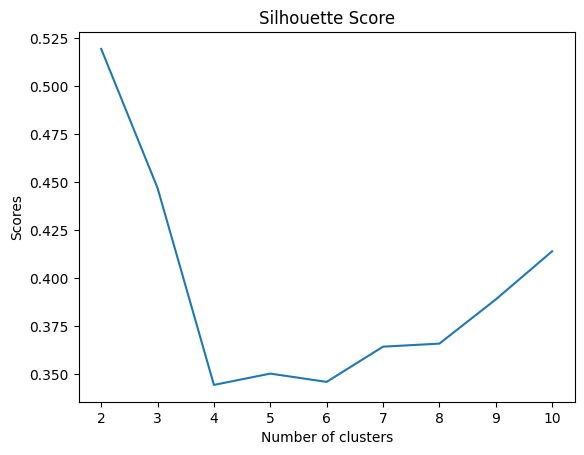

In [62]:
plt.plot(range(2, 11), ac_score)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.show()

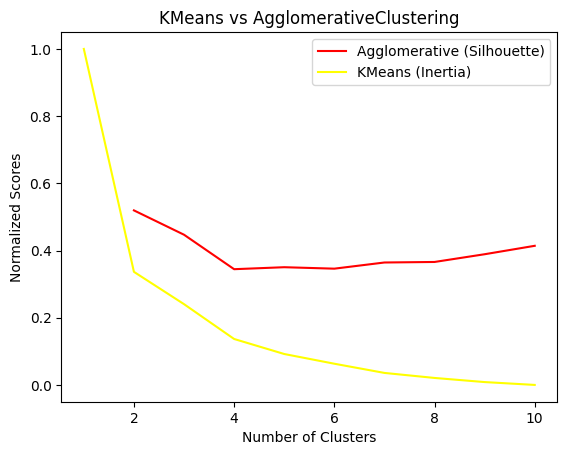

In [64]:
plt.plot(range(2, 11), ac_score, color='red', label='Agglomerative (Silhouette)')
plt.plot(range(1, 11), normalized_kmeans, color='yellow', label='KMeans (Inertia)')
plt.title('KMeans vs AgglomerativeClustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Scores')
plt.legend()
plt.show()

In [50]:
from sklearn.cluster import MeanShift

In [53]:
import numpy as np

In [51]:
ms = MeanShift()
labels_ms = ms.fit_predict(scaled_df)

In [54]:
print("Number of clusters:", len(np.unique(labels_ms)))

Number of clusters: 2


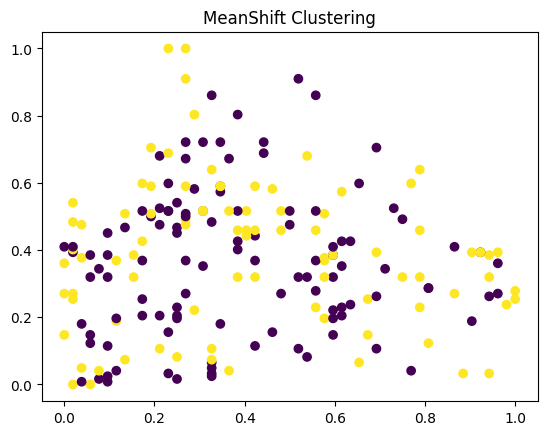

In [65]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=labels_ms, cmap='viridis')
plt.title("MeanShift Clustering")
plt.show()

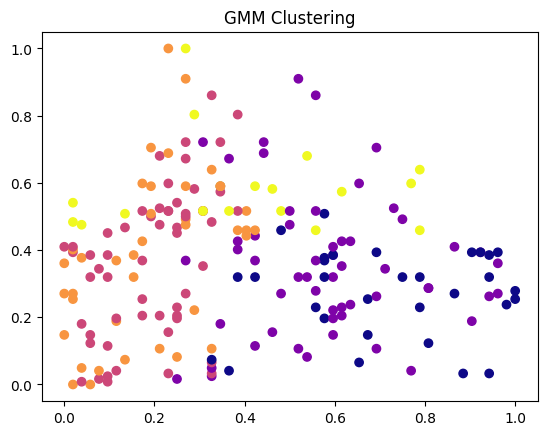

In [66]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)

plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=gmm_labels, cmap='plasma')
plt.title('GMM Clustering')
plt.show()

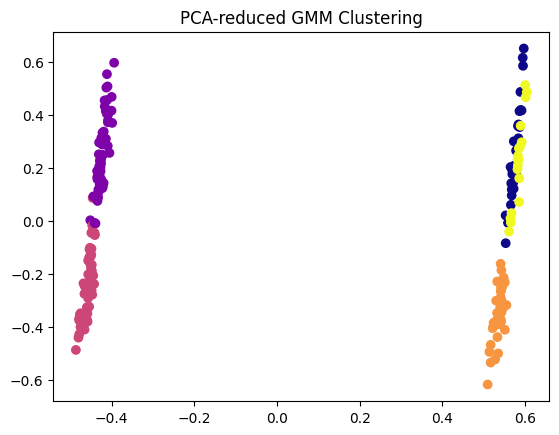

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_df)

plt.scatter(reduced[:, 0], reduced[:, 1], c=gmm_labels, cmap='plasma')
plt.title('PCA-reduced GMM Clustering')
plt.show()

In [68]:
df['Cluster'] = kmeans.labels_
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
Cluster                                                                   
0        57.857143           53.571429               48.523810         1.0
1        34.888889           89.074074               53.444444         0.0
2        20.000000           71.333333               19.833333         1.0
3        33.277778           87.111111               82.666667         1.0
4        41.000000           30.533333               21.200000         0.0
5        26.526316           49.552632               68.921053         0.0
6        53.187500           59.062500               43.468750         0.0
7        25.190476           38.714286               63.190476         1.0
8        55.500000           24.000000               11.166667         1.0
9        44.187500           87.375000               15.562500         1.0


In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("KMeans:", silhouette_score(scaled_df, kmeans.labels_))
print("Agglomerative:", silhouette_score(scaled_df, ac.fit_predict(scaled_df)))
print("GMM:", silhouette_score(scaled_df, gmm_labels))
print("MeanShift:", silhouette_score(scaled_df, labels_ms))

KMeans: 0.32619545933970323
Agglomerative: 0.41403790085368813
GMM: 0.36546776090286387
MeanShift: 0.5194624832665107


In [70]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)  # eps and min_samples need tuning
db_labels = db.fit_predict(scaled_df)

# Check number of clusters (excluding noise points labeled as -1)
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(f"Estimated number of clusters: {n_clusters_}")

Estimated number of clusters: 5


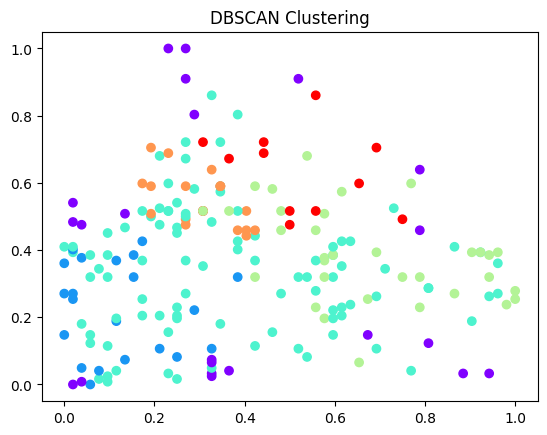

In [71]:
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=db_labels, cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()

In [72]:
# Ignore noise points for evaluation
if len(set(db_labels)) > 1 and len(set(db_labels)) < len(scaled_df):
    score = silhouette_score(scaled_df, db_labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Not enough clusters for Silhouette Score.")

Silhouette Score: 0.230


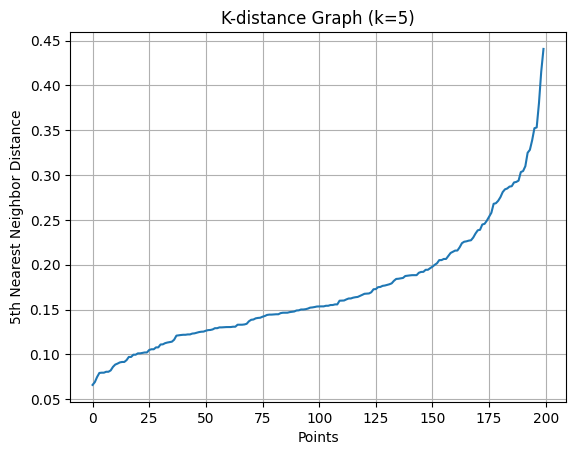

In [73]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)

distances = np.sort(distances[:, 4])  # 4 because n_neighbors = 5
plt.plot(distances)
plt.title("K-distance Graph (k=5)")
plt.xlabel("Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid()
plt.show()

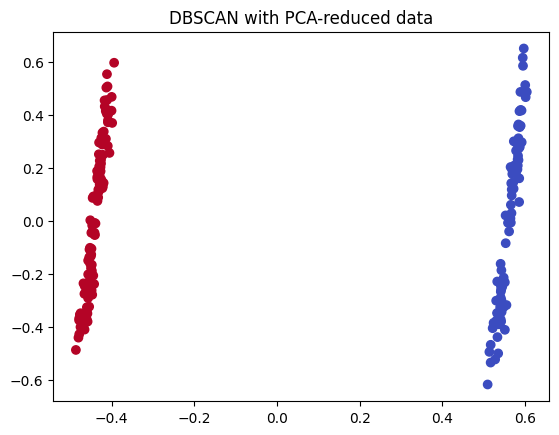

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

db = DBSCAN(eps=0.2, min_samples=5)
db_labels = db.fit_predict(pca_df)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=db_labels, cmap='coolwarm')
plt.title("DBSCAN with PCA-reduced data")
plt.show()